# First queries

## Importations, connexion and cursor

In [1]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("/home/thibault/scere_explore/")

conn = sqlite3.connect('SCERE.db')

c = conn.cursor()

## What are the external databases in the dbxref table ?

In [2]:
databases_list = c.execute("SELECT DISTINCT DBXREF_ID_source FROM dbxref")

## Which locations have the most IDs referenced in dbxref ?

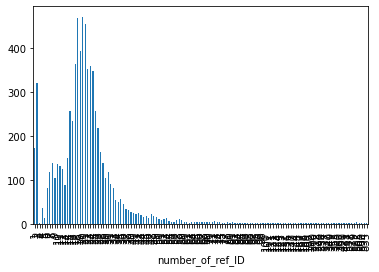

In [3]:
dbxref_ID_number = c.execute("SELECT SGDID, count(SGDID) FROM dbxref GROUP BY SGDID ORDER BY count(SGDID)")
dbxref_ID_number = dbxref_ID_number.fetchall()
ref = pd.DataFrame(dbxref_ID_number, columns=['SGDID', 'number_of_ref_ID'])

hist_ref = ref.groupby(['number_of_ref_ID']).size()

hist_ref.plot(kind = 'bar')
plt.show()

S000000735 with 835 external links. 

## What are the most cited features in the gene_literature table ?

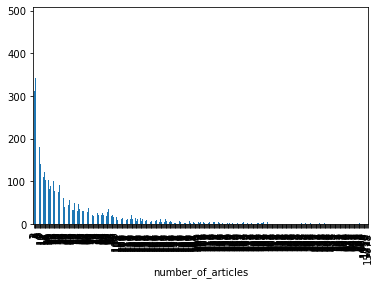

In [4]:
literature_cit_number = c.execute("SELECT SGDID, count(SGDID) FROM gene_literature GROUP BY SGDID ORDER BY count(SGDID)")

lit = pd.DataFrame(literature_cit_number, columns=['SGDID', 'number_of_articles'])

hist_lit = lit.groupby(['number_of_articles']).size()

hist_lit.plot(kind = 'bar')
plt.show()

S000004494 (RAD52) associated with 1212 papers.
Attention, there are 15078 articles not associated with an SGDID! 

## Is there a link between the most cited features and those with the most mutants ? 

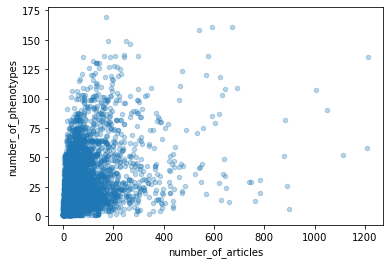

In [5]:
link_cited_phenotypes = c.execute("SELECT SGDID, count(SGDID) FROM phenotypes GROUP BY SGDID ORDER BY count(SGDID)")

pheno = pd.DataFrame(link_cited_phenotypes, columns=['SGDID', 'number_of_phenotypes'])

res = pd.merge(lit, pheno, on='SGDID')

res.plot(x="number_of_articles",y ="number_of_phenotypes", kind='scatter', alpha = 0.3)
plt.show()

## What is the external database that provides the most information? 

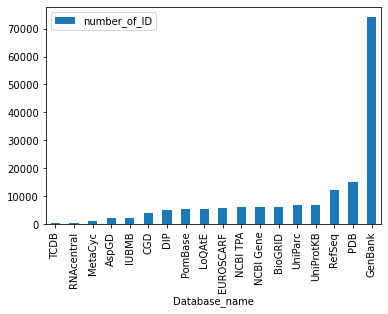

In [6]:
database_maj = c.execute("SELECT DBXREF_ID_source, count(DBXREF_ID_source) FROM dbxref GROUP BY DBXREF_ID_source ORDER BY  count(DBXREF_ID_source)")

dat = pd.DataFrame(database_maj, columns=['Database_name', 'number_of_ID'])

dat.plot(x="Database_name",y ="number_of_ID", kind = 'bar')
plt.show()

#divide GenBank into 3 groups 'ref_type'